In [1]:
exec(open("init_notebook.py").read())
import pyodrx 
import numpy as np
import extensions, junctions
import matplotlib.pyplot as plt
%matplotlib inline

current working dirC:\Users\ishaa\source\repos\junction-art


start points starting
Signal length
20
Signal t-coordinate for straight roads
3
Signal length
43.70740779306799
Signal t-coordinate for straight roads
3
Signal length
100
Signal t-coordinate for straight roads
3
C:\Users\ishaa\Downloads\roadGen\esmini-master\bin\odrplot C:/Users/ishaa/Downloads/roadGen/esmini-master/resources/xodr/pythonroad.xodr


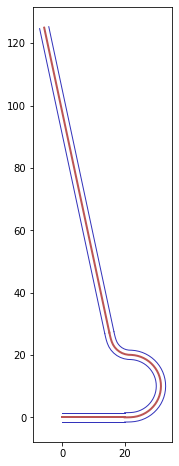

In [2]:
roadBuilder = junctions.RoadBuilder()
#1. create two arbitrary roads

roads = []
roads.append(pyodrx.create_straight_road(0, 20))
# roads.append(pyodrx.create_straight_road(1, junction=1))
# roads.append(pyodrx.create_cloth_arc_cloth(.05, arc_angle=(np.pi - np.pi/4), cloth_angle=np.pi/8, r_id=1, junction = 1))
# roads.append(roadBuilder.createSimpleCurve(1, np.pi/4, True, curvature = 0.9))
# roads.append(roadBuilder.createSimpleCurveWithLongArc(1, -np.pi/16, True, curvature = 0.5))
roads.append(roadBuilder.createS(1, -np.pi/20, True, curvature = 0.1))
roads.append(pyodrx.create_straight_road(2))

roads[0].add_successor(pyodrx.ElementType.junction,1)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.junction,1)

#2. create a connection road



# 3. create junction
junction = pyodrx.Junction('test',1)

con1 = pyodrx.Connection(0,1,pyodrx.ContactPoint.start)
con1.add_lanelink(-1,-1)

junction.add_connection(con1)


#4. make xord, add roads, add junctions, adjust

# create the opendrive
odr = pyodrx.OpenDrive('myroad')
for r in roads:
    odr.add_road(r)

# odr.add_junction(junction)
odr.adjust_roads_and_lanes()
for i in range(3):
    odr.roads[str(i)].addSignal()
    

# pyodrx.prettyprint(odr.get_element())

extensions.view_road(odr,os.path.join('..','C:\\Users\\ishaa\\Downloads\\roadGen\\esmini-master'))

In [19]:
roads[1].curveType

<StandardCurveTypes.S: 3>